## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  31.458097   882.357248  0.562486   1.244398  1.580037
1   9.659505  1654.533824  0.576636   4.536767  1.495039
2  91.290126  1506.553093  0.165263   9.768682  1.326708
3  16.546856   786.762040  0.114040  10.551375  1.322775
4  73.716672  1677.280242  0.142666   5.529455  1.264912


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0193022	total: 67.7ms	remaining: 1m 7s
1:	learn: 1.0102755	total: 68.3ms	remaining: 34.1s
2:	learn: 0.9998544	total: 68.8ms	remaining: 22.9s
3:	learn: 0.9889736	total: 69.5ms	remaining: 17.3s
4:	learn: 0.9800650	total: 70ms	remaining: 13.9s
5:	learn: 0.9739173	total: 70.6ms	remaining: 11.7s
6:	learn: 0.9647452	total: 71.2ms	remaining: 10.1s
7:	learn: 0.9555124	total: 71.8ms	remaining: 8.91s
8:	learn: 0.9462742	total: 72.3ms	remaining: 7.96s
9:	learn: 0.9372051	total: 72.7ms	remaining: 7.2s
10:	learn: 0.9282448	total: 73.2ms	remaining: 6.58s
11:	learn: 0.9187155	total: 73.6ms	remaining: 6.06s
12:	learn: 0.9108257	total: 74.1ms	remaining: 5.62s
13:	learn: 0.9021415	total: 74.6ms	remaining: 5.25s
14:	learn: 0.8939921	total: 75.1ms	remaining: 4.93s
15:	learn: 0.8859244	total: 75.4ms	remaining: 4.64s
16:	learn: 0.8784845	total: 75.9ms	remaining: 4.39s
17:	learn: 0.8695247	total: 76.4ms	remaining: 4.17s
18:	learn: 0.8623349	total: 76.8ms	remaining: 3

91:	learn: 0.4837205	total: 108ms	remaining: 1.07s
92:	learn: 0.4800510	total: 109ms	remaining: 1.06s
93:	learn: 0.4759604	total: 109ms	remaining: 1.05s
94:	learn: 0.4720552	total: 110ms	remaining: 1.04s
95:	learn: 0.4688961	total: 110ms	remaining: 1.03s
96:	learn: 0.4659761	total: 110ms	remaining: 1.03s
97:	learn: 0.4630699	total: 111ms	remaining: 1.02s
98:	learn: 0.4606439	total: 111ms	remaining: 1.01s
99:	learn: 0.4575806	total: 112ms	remaining: 1s
100:	learn: 0.4545321	total: 112ms	remaining: 996ms
101:	learn: 0.4522836	total: 112ms	remaining: 989ms
102:	learn: 0.4491554	total: 113ms	remaining: 981ms
103:	learn: 0.4456660	total: 113ms	remaining: 974ms
104:	learn: 0.4429517	total: 113ms	remaining: 967ms
105:	learn: 0.4398151	total: 114ms	remaining: 960ms
106:	learn: 0.4368943	total: 114ms	remaining: 953ms
107:	learn: 0.4332047	total: 115ms	remaining: 946ms
108:	learn: 0.4304151	total: 115ms	remaining: 939ms
109:	learn: 0.4282153	total: 115ms	remaining: 933ms
110:	learn: 0.4257479	to

273:	learn: 0.2051567	total: 185ms	remaining: 491ms
274:	learn: 0.2046293	total: 186ms	remaining: 490ms
275:	learn: 0.2040212	total: 186ms	remaining: 488ms
276:	learn: 0.2035784	total: 187ms	remaining: 487ms
277:	learn: 0.2032969	total: 187ms	remaining: 486ms
278:	learn: 0.2023400	total: 187ms	remaining: 484ms
279:	learn: 0.2021265	total: 188ms	remaining: 483ms
280:	learn: 0.2016892	total: 188ms	remaining: 482ms
281:	learn: 0.2012225	total: 188ms	remaining: 480ms
282:	learn: 0.2010104	total: 189ms	remaining: 479ms
283:	learn: 0.2005494	total: 189ms	remaining: 477ms
284:	learn: 0.2003070	total: 190ms	remaining: 476ms
285:	learn: 0.1998248	total: 190ms	remaining: 475ms
286:	learn: 0.1993524	total: 191ms	remaining: 474ms
287:	learn: 0.1986267	total: 191ms	remaining: 473ms
288:	learn: 0.1984492	total: 192ms	remaining: 471ms
289:	learn: 0.1976324	total: 192ms	remaining: 470ms
290:	learn: 0.1974432	total: 193ms	remaining: 469ms
291:	learn: 0.1969480	total: 193ms	remaining: 468ms
292:	learn: 

510:	learn: 0.1099397	total: 290ms	remaining: 277ms
511:	learn: 0.1097885	total: 290ms	remaining: 277ms
512:	learn: 0.1092793	total: 291ms	remaining: 276ms
513:	learn: 0.1091321	total: 291ms	remaining: 275ms
514:	learn: 0.1085673	total: 291ms	remaining: 274ms
515:	learn: 0.1081189	total: 292ms	remaining: 274ms
516:	learn: 0.1075561	total: 292ms	remaining: 273ms
517:	learn: 0.1074195	total: 293ms	remaining: 272ms
518:	learn: 0.1072552	total: 293ms	remaining: 272ms
519:	learn: 0.1068159	total: 294ms	remaining: 271ms
520:	learn: 0.1063317	total: 294ms	remaining: 271ms
521:	learn: 0.1062006	total: 295ms	remaining: 270ms
522:	learn: 0.1056597	total: 295ms	remaining: 269ms
523:	learn: 0.1055316	total: 296ms	remaining: 269ms
524:	learn: 0.1051036	total: 296ms	remaining: 268ms
525:	learn: 0.1046378	total: 296ms	remaining: 267ms
526:	learn: 0.1044645	total: 297ms	remaining: 266ms
527:	learn: 0.1041668	total: 297ms	remaining: 266ms
528:	learn: 0.1037491	total: 298ms	remaining: 265ms
529:	learn: 

688:	learn: 0.0599776	total: 368ms	remaining: 166ms
689:	learn: 0.0597274	total: 368ms	remaining: 166ms
690:	learn: 0.0594410	total: 369ms	remaining: 165ms
691:	learn: 0.0591601	total: 369ms	remaining: 164ms
692:	learn: 0.0589437	total: 370ms	remaining: 164ms
693:	learn: 0.0588348	total: 370ms	remaining: 163ms
694:	learn: 0.0587281	total: 371ms	remaining: 163ms
695:	learn: 0.0584973	total: 371ms	remaining: 162ms
696:	learn: 0.0583923	total: 371ms	remaining: 161ms
697:	learn: 0.0582957	total: 372ms	remaining: 161ms
698:	learn: 0.0580173	total: 372ms	remaining: 160ms
699:	learn: 0.0578624	total: 373ms	remaining: 160ms
700:	learn: 0.0576501	total: 373ms	remaining: 159ms
701:	learn: 0.0574265	total: 374ms	remaining: 159ms
702:	learn: 0.0571551	total: 374ms	remaining: 158ms
703:	learn: 0.0569221	total: 374ms	remaining: 157ms
704:	learn: 0.0566554	total: 375ms	remaining: 157ms
705:	learn: 0.0564505	total: 375ms	remaining: 156ms
706:	learn: 0.0561794	total: 376ms	remaining: 156ms
707:	learn: 

928:	learn: 0.0290908	total: 472ms	remaining: 36.1ms
929:	learn: 0.0289453	total: 473ms	remaining: 35.6ms
930:	learn: 0.0288159	total: 473ms	remaining: 35.1ms
931:	learn: 0.0287535	total: 473ms	remaining: 34.5ms
932:	learn: 0.0286111	total: 474ms	remaining: 34ms
933:	learn: 0.0284850	total: 474ms	remaining: 33.5ms
934:	learn: 0.0284246	total: 475ms	remaining: 33ms
935:	learn: 0.0282853	total: 475ms	remaining: 32.5ms
936:	learn: 0.0282265	total: 475ms	remaining: 32ms
937:	learn: 0.0280979	total: 476ms	remaining: 31.4ms
938:	learn: 0.0280185	total: 476ms	remaining: 30.9ms
939:	learn: 0.0278823	total: 476ms	remaining: 30.4ms
940:	learn: 0.0277606	total: 477ms	remaining: 29.9ms
941:	learn: 0.0276929	total: 477ms	remaining: 29.4ms
942:	learn: 0.0275596	total: 478ms	remaining: 28.9ms
943:	learn: 0.0275034	total: 478ms	remaining: 28.4ms
944:	learn: 0.0273985	total: 478ms	remaining: 27.8ms
945:	learn: 0.0272843	total: 479ms	remaining: 27.3ms
946:	learn: 0.0271536	total: 479ms	remaining: 26.8ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

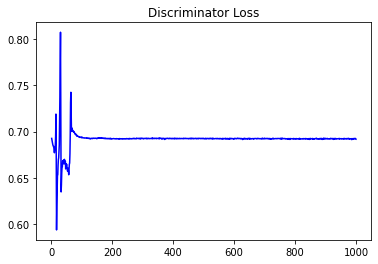

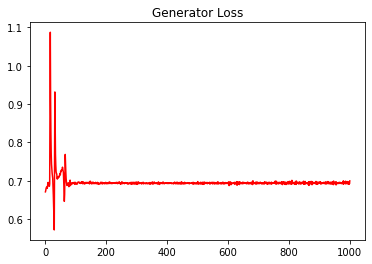

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.3204718459503663


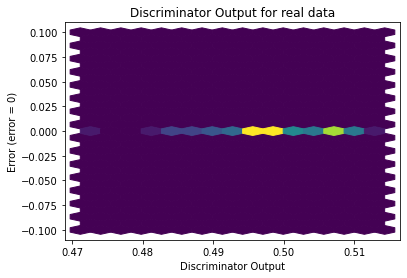

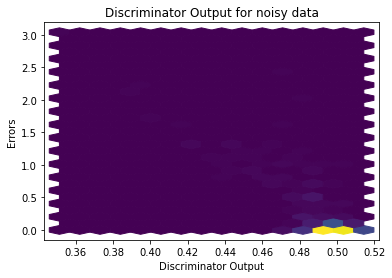

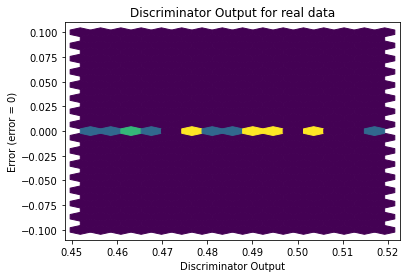

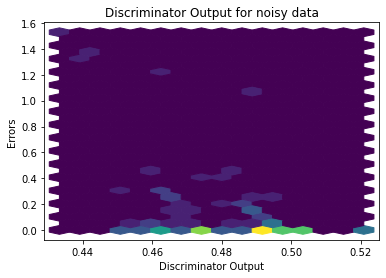

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


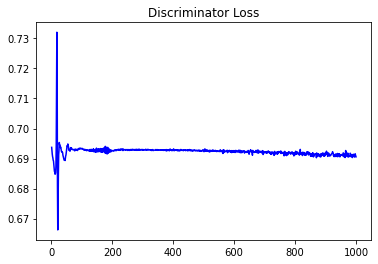

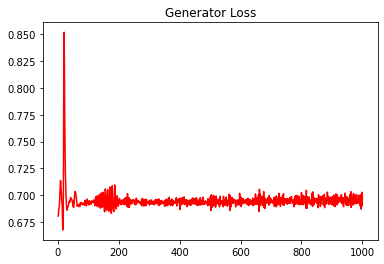

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.38044816753828753


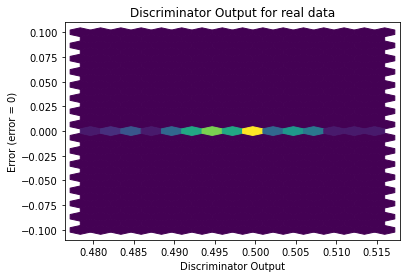

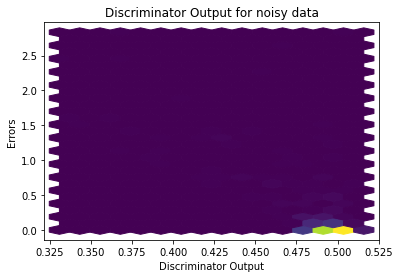

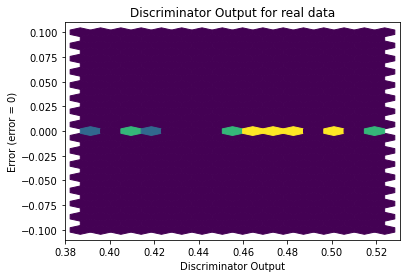

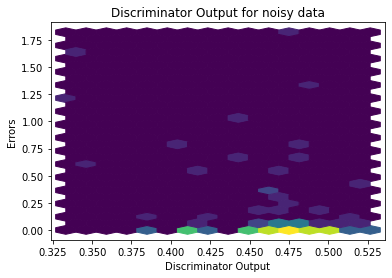

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5619]], requires_grad=True)
